In [2]:
pip install matplotlib seaborn pandas plotly

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import plotly.express as px

In [5]:
df=pd.read_csv("haberman.csv")
df.shape

(306, 4)

In [5]:
df.head()

,patient_age,operation_year,nodes_detected,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   patient_age      306 non-null    int64
 1   operation_year   306 non-null    int64
 2   nodes_detected   306 non-null    int64
 3   survival_status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [7]:
df.describe()

,patient_age,operation_year,nodes_detected,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [8]:
df["survival_status"].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

In [9]:
df["patient_age"].value_counts()

52    14
54    13
50    12
47    11
53    11
43    11
57    11
55    10
65    10
49    10
38    10
41    10
61     9
45     9
42     9
63     8
59     8
62     7
44     7
58     7
56     7
46     7
70     7
34     7
48     7
37     6
67     6
60     6
51     6
39     6
66     5
64     5
72     4
69     4
40     3
30     3
68     2
73     2
74     2
36     2
35     2
33     2
31     2
78     1
71     1
75     1
76     1
77     1
83     1
Name: patient_age, dtype: int64

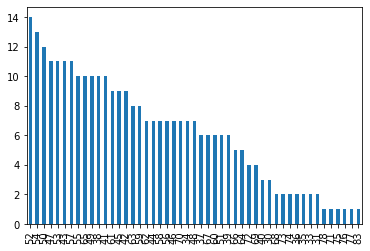

In [10]:
df["patient_age"].value_counts().plot.bar()

Imbalance data set the no of patients are imbalance as per the age.

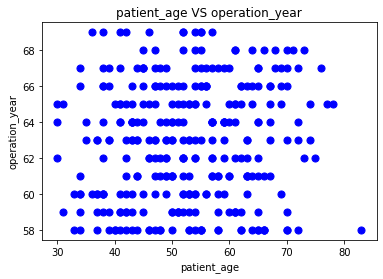

In [13]:
patient_age=df["patient_age"].values
operation_year=df["operation_year"].values

plt.scatter(patient_age,operation_year,s=50,c="blue")
plt.title("patient_age VS operation_year")
plt.xlabel("patient_age")
plt.ylabel("operation_year")
plt.show()

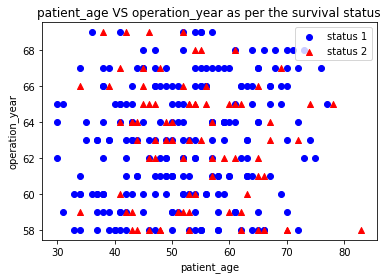

In [18]:
patient_age1=df["patient_age"][df["survival_status"]==1]
operation_year1=df["operation_year"][df["survival_status"]==1]

patient_age2=df["patient_age"][df["survival_status"]==2]
operation_year2=df["operation_year"][df["survival_status"]==2]

plt.scatter(patient_age1,operation_year1,c="blue",label="status 1",marker="o")
plt.scatter(patient_age2,operation_year2,c="red",label="status 2",marker="^")
plt.title("patient_age VS operation_year as per the survival status")
plt.xlabel("patient_age")
plt.ylabel("operation_year")
plt.legend()
plt.show()

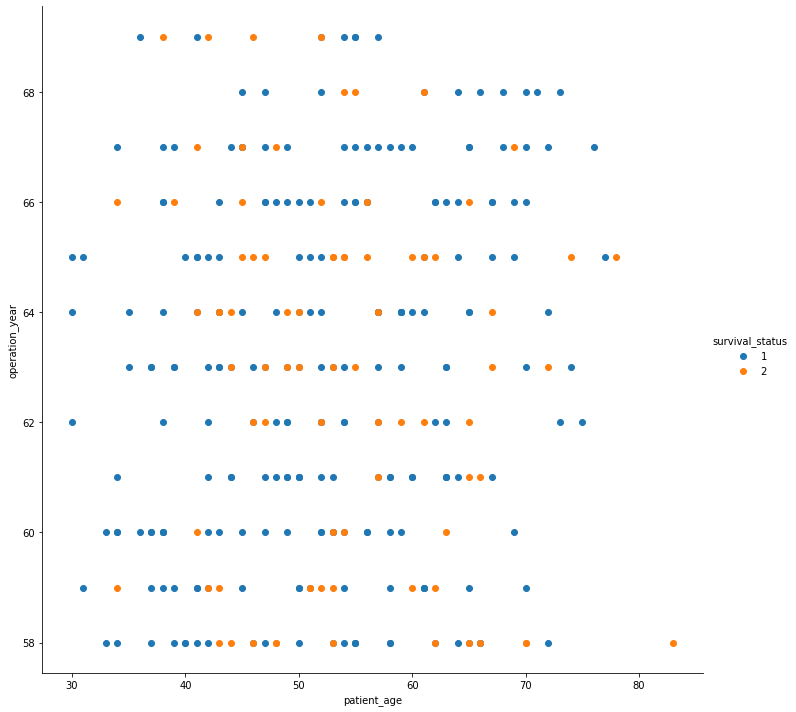

In [25]:
sns.FacetGrid(df, hue="survival_status", height=10) .map(plt.scatter, "patient_age", "operation_year") .add_legend()
plt.show()

In [26]:
px.scatter_3d(df,x="patient_age", y="operation_year", z="nodes_detected",color="survival_status")

In [27]:
list(df.columns[:-1])

['patient_age', 'operation_year', 'nodes_detected']

In [29]:
from itertools import combinations

def number_of_plots_in_pair_plot(*args):
  combos=list(combinations([*args],2))
  return combos, len(combos)*2 + len(args)

print(number_of_plots_in_pair_plot(*df.columns[:-1]))

([('patient_age', 'operation_year'), ('patient_age', 'nodes_detected'), ('operation_year', 'nodes_detected')], 9)


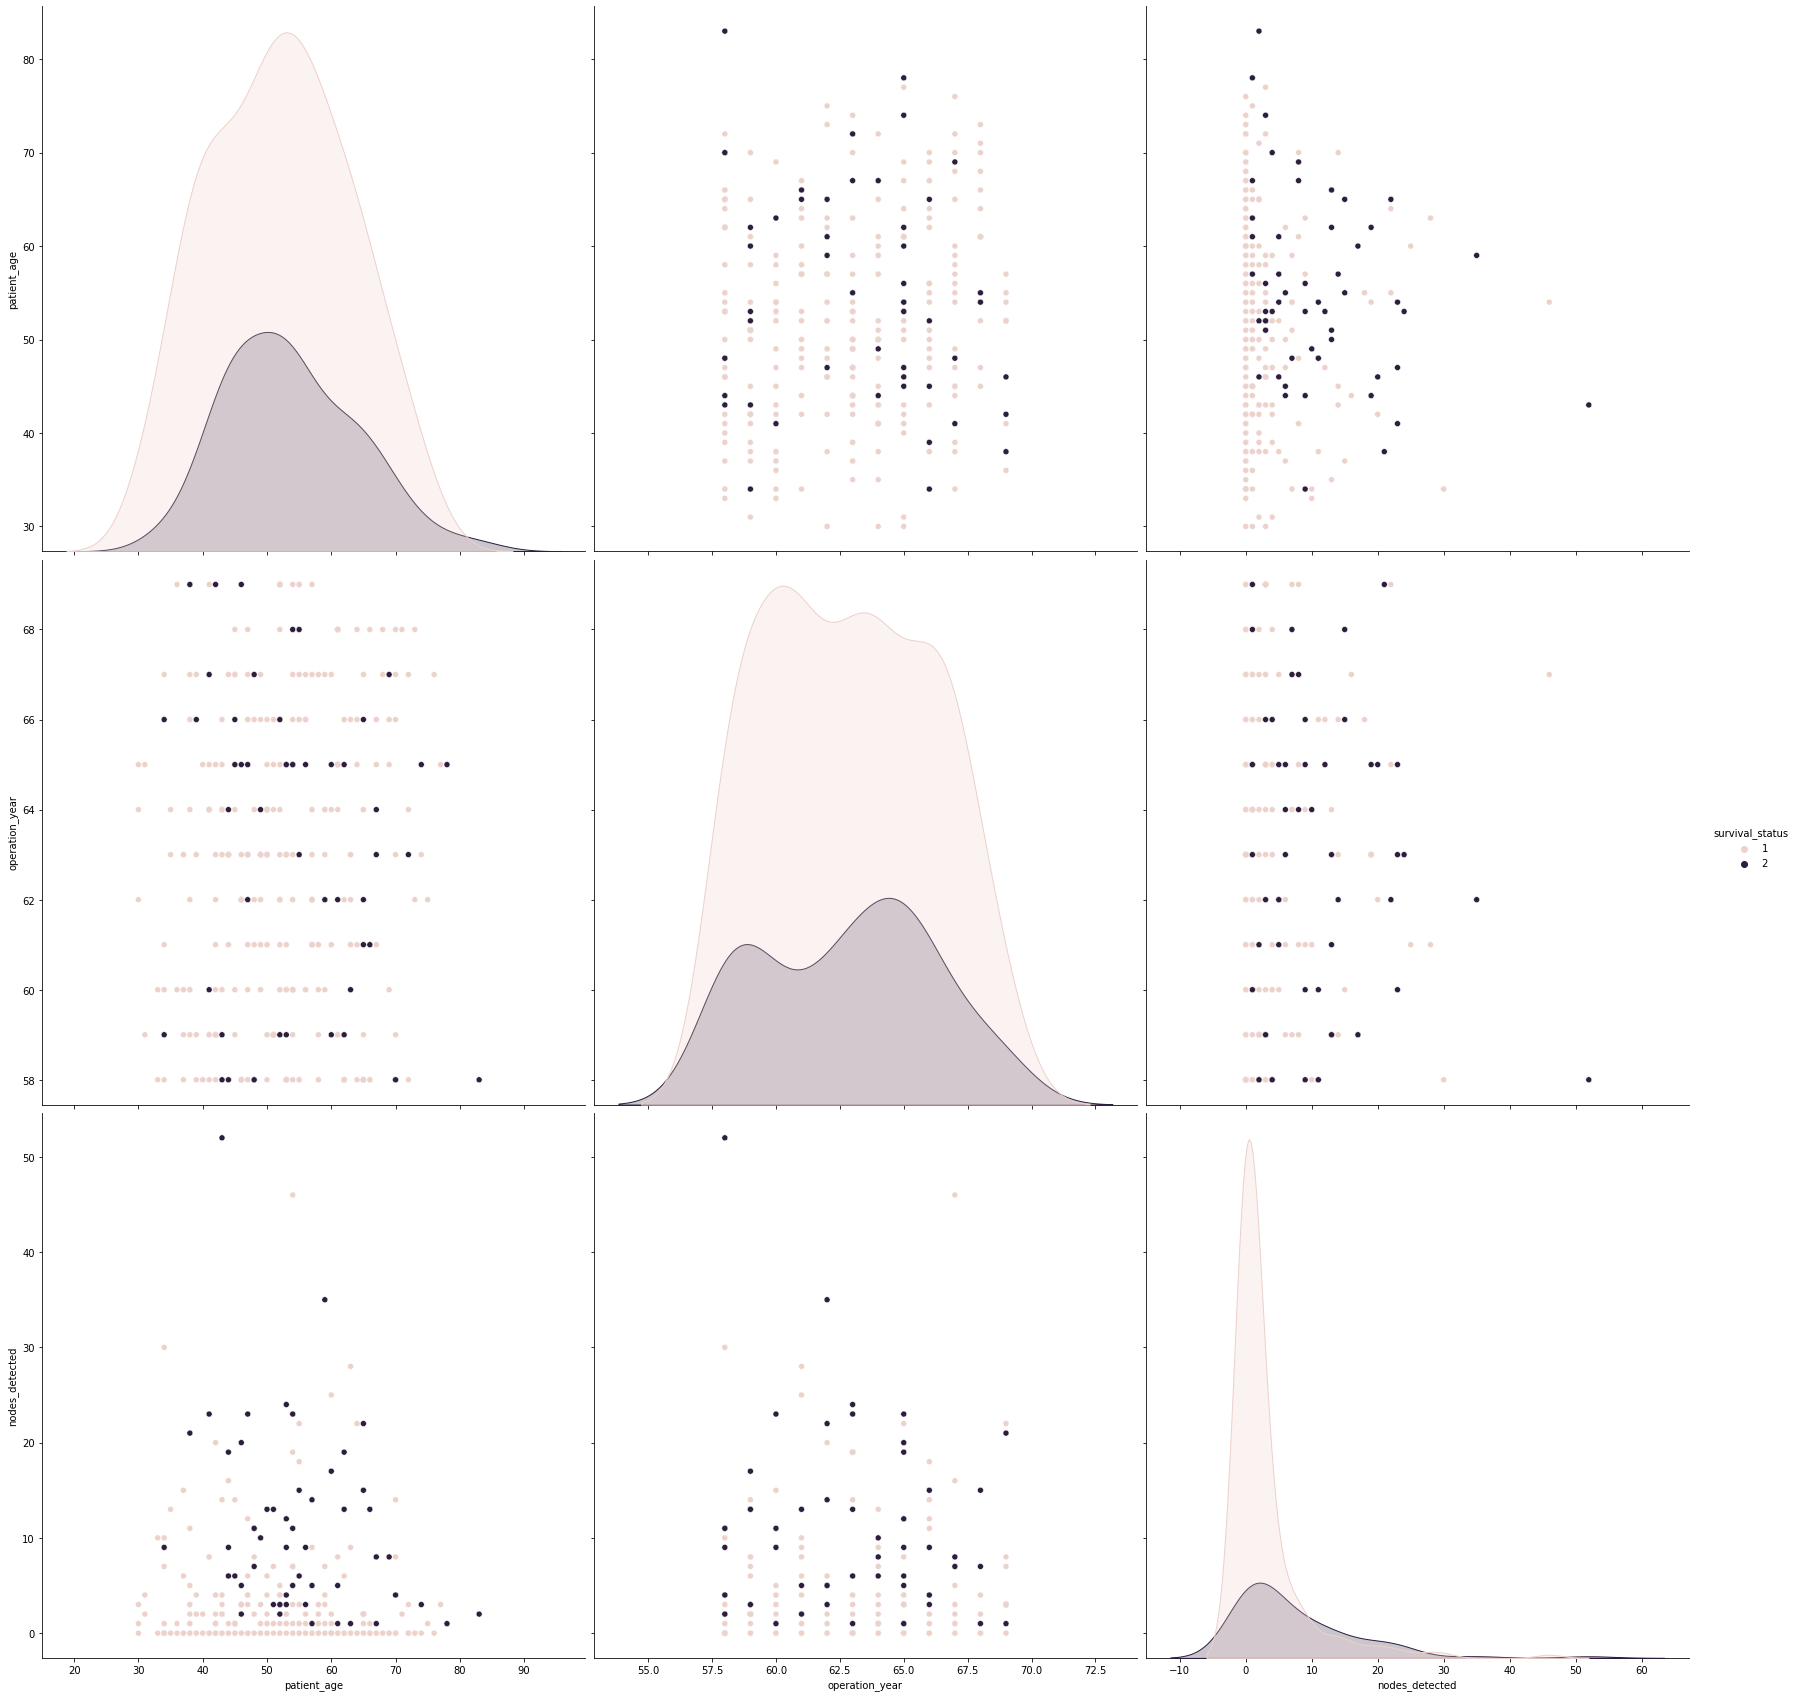

In [31]:
sns.pairplot(df,hue="survival_status", height=8)
plt.show()

**Limitations of pair plots**
Doesn't help much when a huge no of dimensions  

In [7]:
from itertools import combinations

def number_of_plots_in_pair_plot(*args):
  combos=list(combinations([*args],2))
  return combos,len(combos)*2+len(args)

print(number_of_plots_in_pair_plot(*df.columns[:-1]))

([('patient_age', 'operation_year'), ('patient_age', 'nodes_detected'), ('operation_year', 'nodes_detected')], 9)


In [ ]:
from itertools import combinations

def number_of_plots_in_pair_plot(*args):
  combos=list(combinations([*args],2))
  return combos,len(combos)*2+len(args)

print(number_of_plots_in_pair_plot(*df.columns[:-1]))

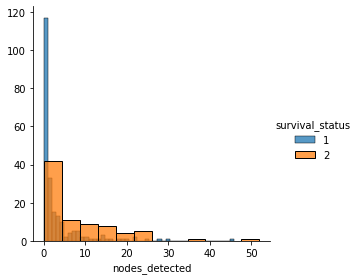

In [8]:
sns.FacetGrid(df,hue="survival_status",height=4) .map(sns.histplot,"nodes_detected") .add_legend()
plt.show()

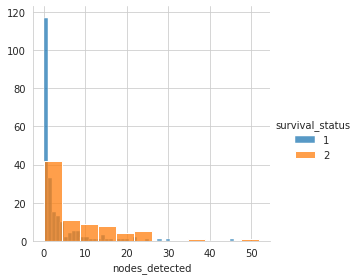

In [12]:
sns.set_style("whitegrid")
sns.FacetGrid(df,hue="survival_status",height=4) .map(sns.histplot,"nodes_detected") .add_legend()
plt.show()

**Probability Density Function (PDF)**

In [18]:
print(df['nodes_detected'].values)
print(np.mean(df['nodes_detected'].values))
print(np.std(df['nodes_detected'].values))

[ 1  3  0  2  4 10  0  0  9 30  1 10  7  0 13  0  1  0  0  0  0  6 15  0
 21  2  0  0  3  1  0 11  1  5  0  0  0  0  2  4  2  0  0 23  0  0  0  8
  0  0  8  0  0  1  0  0  1  2  4 20  0  1 52  2  0  0 14  2  3  0  2  0
  4  6  9 19  0  1  0 16  6  0  1  0  0 14  0  0  1  2  3  5 20  0  3  0
 23  0  0  0  6  0  0  3  4  4 12 11 11  7  8  2  0  0  0 10  1  0  0  1
  1  3  0  1 13  0  0  6  0  1  1  2  0  0  4  1 13  3  7  1  0  1  3  2
  3  4  0  4  0  4  5  0  1  0  0  0  4  1  3  9 24 12  1  1  2  1  0 11
 23  5  7  7  3  0 46  0  7 19  1  0  6 15  1  0  1 18  0  3 22  1  9  3
  0  2  1  0  0  5 14  1  9  0  0  0  0  0  0  0  0  3  1  0  0  3  2 35
  0  0  1  4  0  7  3 17  0  1  2 25  0  5  0  1  0  0  0  8  0  0 13  0
 19  6  0  0  0  1  0  0  0  0  0  9 28  0 22  0  0  0  0  2 22 15  0  0
  0  2  0  1  0 13  0  1  0  8  1  0  0  0  0  0  0  8  0  0  0  0  4 14
  0  0  8  0  2  0  0  0  3  0  0  3  0  1  0  3  1  2]
4.026143790849673
7.177896092811143


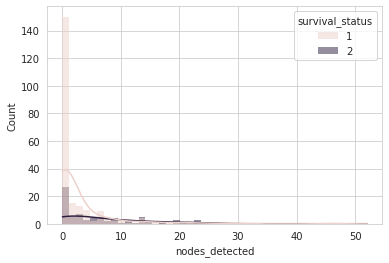

In [15]:
sns.histplot(df, x=df["nodes_detected"], hue="survival_status", kde=True, linewidth=0)
plt.show()

**Cumulative Distribuion Function**

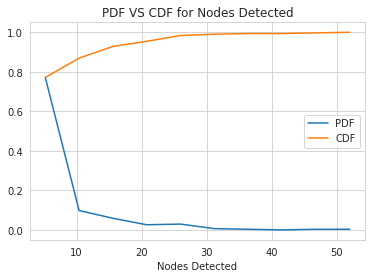

In [19]:
hist, bins=np.histogram(df["nodes_detected"], bins=10, density=True)

pdf=hist/(sum(hist))
cdf=np.cumsum(pdf)

plt.plot(bins[1:],pdf,label="PDF")
plt.plot(bins[1:],cdf,label="CDF")
plt.xlabel("Nodes Detected")
plt.title(f"PDF VS CDF for Nodes Detected")
plt.legend(loc="best")
plt.show()

In [20]:
 iris_status1=df.loc[df["survival_status"]==1];
 iris_status2=df.loc[df["survival_status"]==2];

In [24]:
print("Mean Values")
print(np.mean(iris_status1["nodes_detected"]))

#with an outlier
print(np.mean(np.append(iris_status1["nodes_detected"],100)))
print(np.mean(iris_status2["nodes_detected"]))

Mean Values
2.7911111111111113
3.2212389380530975
7.45679012345679


In [25]:
print("Standard Deviation Values")
print(np.std(iris_status1["nodes_detected"]))
print(np.std(iris_status2["nodes_detected"]))


Standard Deviation Values
5.857258449412131
9.128776076761632


In [26]:
print("Median")
print(np.median(iris_status1["nodes_detected"]))
print(np.median(iris_status2["nodes_detected"]))

Median
0.0
4.0


In [27]:
np.median([1,2,3,4,5,6])

3.5